In [20]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import os

from preprocessing.scripts import split_movie_script
from testing.vader import model as vadar
from movie_sentiment_plot import movie_sentiment_plot

In [21]:
movie_list = os.listdir('./raw_data/screenplay_data/data/raw_texts/raw_texts')

In [22]:
#moving average
def moving_average(data, window_size):
    weights = np.repeat(1.0, window_size) / window_size
    moving_avg = np.convolve(data, weights, 'valid')
    return moving_avg

In [23]:
# Given the parameters for each movie title, calculates the text chunk scores
def movie_raw_score(movie_title, typer, pad, rm_stopwords, group_chunk):
    
    movie_script_splitted = split_movie_script(movie_title, typer=typer, \
                                               pad=pad, lower=False, rm_stopwords=rm_stopwords, \
                                               lemmatize=False)
    
    movie_script_scored = vadar(movie_script_splitted, group_chunk)
    
    return movie_script_scored

In [37]:
#Given a movie name and a list of parameters, plot different movie arcs

def arc_grid_search(movie_title):
    # plots the arc with different values for: sentence, pad, window_size for moving average
    
 
    fig, axs = plt.subplots(2,2, figsize=(10, 6))

    #With Stop_Words
    rm_stopwords = True
    raw_score = movie_raw_score(movie_title, typer='words', pad=5, rm_stopwords=rm_stopwords, group_chunk=10)
    moving_avg = moving_average(raw_score['compound'], 50)
    print(f'step {1} - {rm_stopwords}')
    axs[0,0].plot(moving_avg, label=rm_stopwords, color='blue')
    axs[0,0].set_title(f'p=5, ws=50, g=10', fontsize=8)

    raw_score = movie_raw_score(movie_title, typer='words', pad=50, rm_stopwords=rm_stopwords, group_chunk=10)
    moving_avg = moving_average(raw_score['compound'], 10)
    print(f'step {2} - {rm_stopwords}')
    axs[0,1].plot(moving_avg, label=rm_stopwords, color='blue')
    axs[0,1].set_title(f'p=50, ws=10, g=10', fontsize=8)

    raw_score = movie_raw_score(movie_title, typer='words', pad=50, rm_stopwords=rm_stopwords, group_chunk=1)
    moving_avg = moving_average(raw_score['compound'], 50)
    print(f'step {3} - {rm_stopwords}')
    axs[1,0].plot(moving_avg, label=rm_stopwords, color='blue')
    axs[1,0].set_title(f'p=50, ws=50, g=1', fontsize=8)

    raw_score = movie_raw_score(movie_title, typer='sentence', pad=50, rm_stopwords=rm_stopwords, group_chunk=10)
    moving_avg = moving_average(raw_score['compound'], 50)
    print(f'step {4} - {rm_stopwords}')
    axs[1,1].plot(moving_avg, label=rm_stopwords, color='blue')
    axs[1,1].set_title(f'p=50, ws=50, g=10', fontsize=8)

    # #With No Stop_Words
    rm_stopwords = False
    raw_score = movie_raw_score(movie_title, typer='words', pad=5, rm_stopwords=rm_stopwords, group_chunk=10)
    moving_avg = moving_average(raw_score['compound'], 50)
    print(f'step {1} - {rm_stopwords}')
    axs[0,0].plot(moving_avg, label=rm_stopwords, color='red')
    plt.legend()

    raw_score = movie_raw_score(movie_title, typer='words', pad=50, rm_stopwords=rm_stopwords, group_chunk=10)
    moving_avg = moving_average(raw_score['compound'], 10)
    print(f'step {2} - {rm_stopwords}')
    axs[0,1].plot(moving_avg, label=rm_stopwords, color='red')
    plt.legend()

    raw_score = movie_raw_score(movie_title, typer='words', pad=50, rm_stopwords=rm_stopwords, group_chunk=1)
    moving_avg = moving_average(raw_score['compound'], 50)
    print(f'step {3} - {rm_stopwords}')
    axs[1,0].plot(moving_avg, label=rm_stopwords, color='red')
    plt.legend()

    raw_score = movie_raw_score(movie_title, typer='sentence', pad=50, rm_stopwords=rm_stopwords, group_chunk=10)
    moving_avg = moving_average(raw_score['compound'], 50)
    print(f'step {4} - {rm_stopwords}')
    axs[1,1].plot(moving_avg, label=rm_stopwords, color='red')
    plt.legend()

step 1 - True
step 2 - True
step 3 - True
step 4 - True
step 1 - False
step 2 - False
step 3 - False
step 4 - False


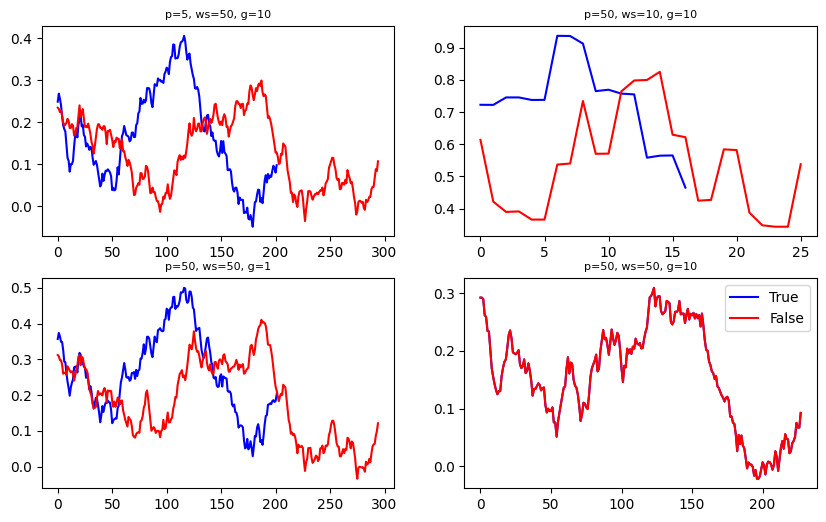

In [38]:
arc_grid_search('Up_1049413.txt')

step 1 - True
step 2 - True
step 3 - True
step 4 - True
step 1 - False
step 2 - False
step 3 - False
step 4 - False


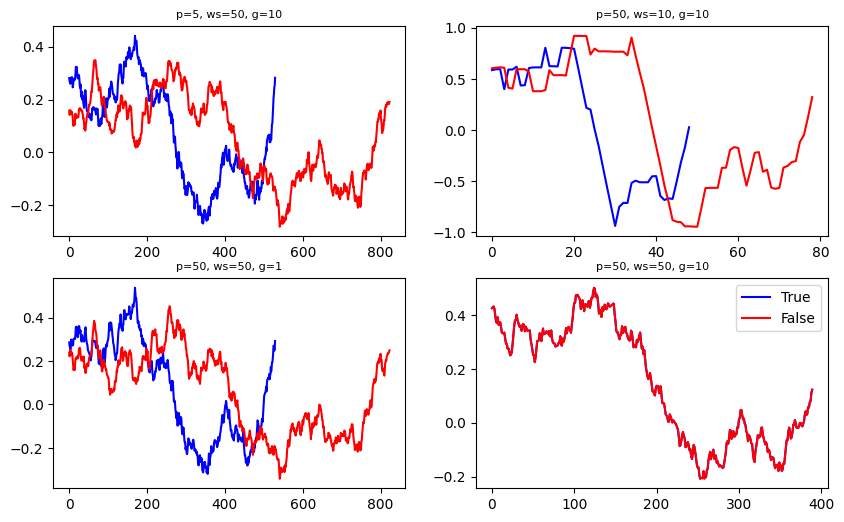

In [39]:
arc_grid_search('Titanic_0120338.txt')

step 1 - True
step 2 - True
step 3 - True
step 4 - True
step 1 - False
step 2 - False
step 3 - False
step 4 - False


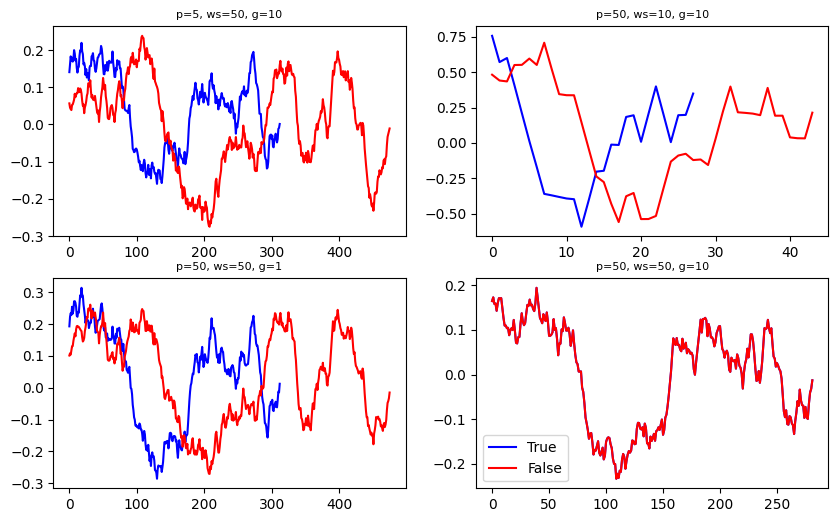

In [40]:
arc_grid_search('V for Vendetta_0434409.txt')

step 1 - True
step 2 - True
step 3 - True
step 4 - True
step 1 - False
step 2 - False
step 3 - False
step 4 - False


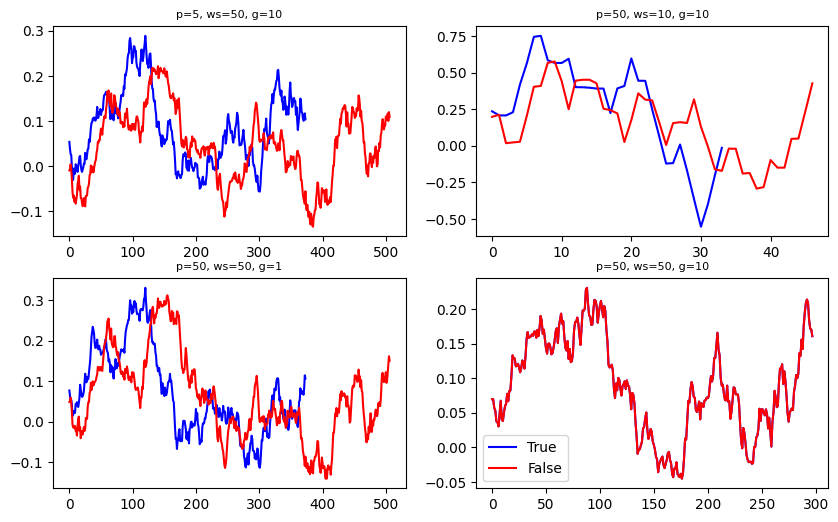

In [41]:
arc_grid_search('Harry Potter and the Sorcerer s Stone_0241527.txt')

step 1 - True
step 2 - True
step 3 - True
step 4 - True
step 1 - False
step 2 - False
step 3 - False
step 4 - False


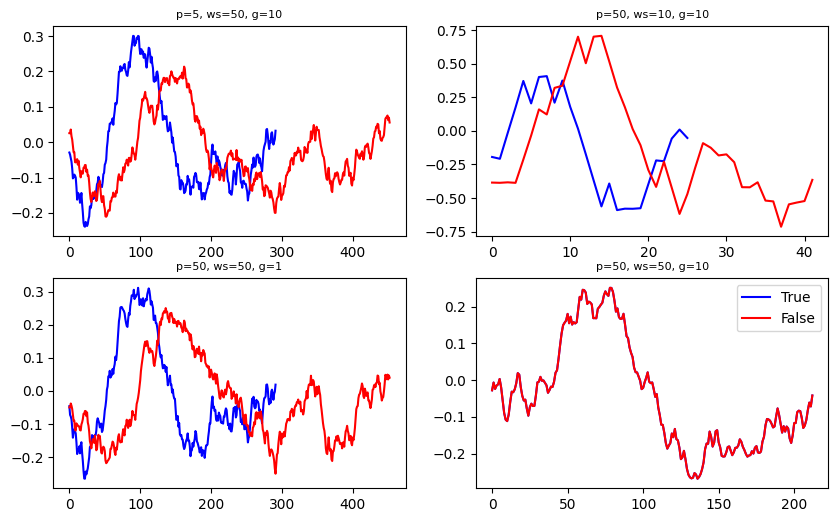

In [42]:
arc_grid_search('Men in Black_0119654.txt')

step 1 - True
step 2 - True
step 3 - True
step 4 - True
step 1 - False
step 2 - False
step 3 - False
step 4 - False


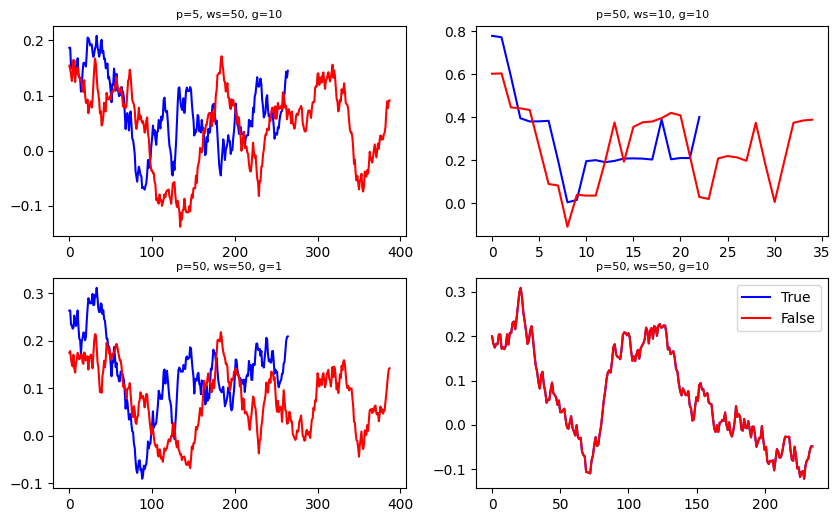

In [43]:
arc_grid_search('Toy Story_0114709.txt')

step 1 - True
step 2 - True
step 3 - True
step 4 - True
step 1 - False
step 2 - False
step 3 - False
step 4 - False


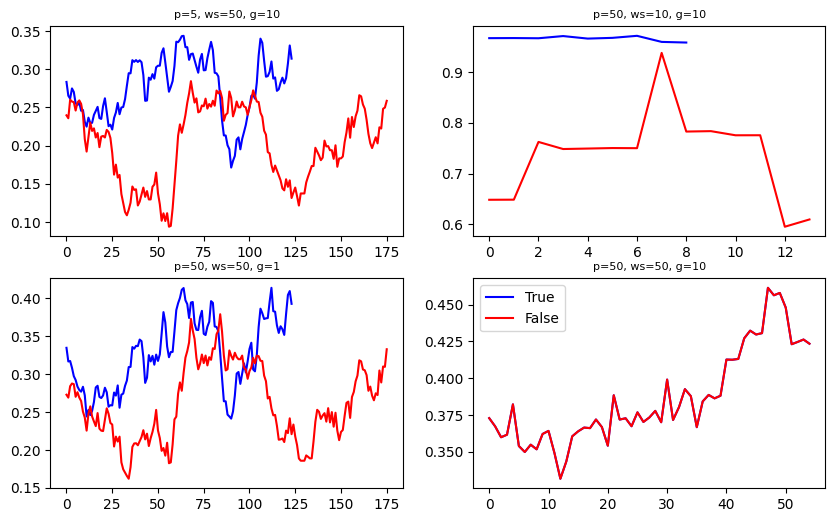

In [44]:
arc_grid_search('Hairspray_0427327.txt')

step 1 - True
step 2 - True
step 3 - True
step 4 - True
step 1 - False
step 2 - False
step 3 - False
step 4 - False


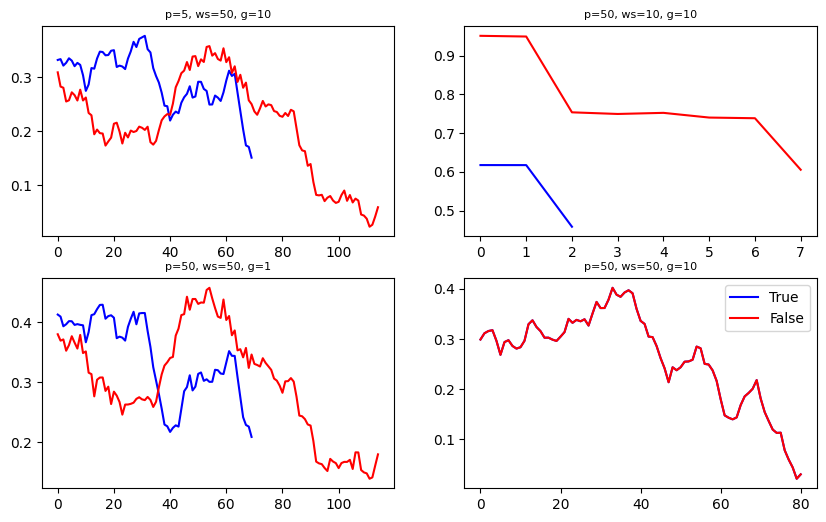

In [45]:
arc_grid_search('Edward Scissorhands_0099487.txt')

step 1 - True
step 2 - True
step 3 - True
step 4 - True
step 1 - False
step 2 - False
step 3 - False
step 4 - False


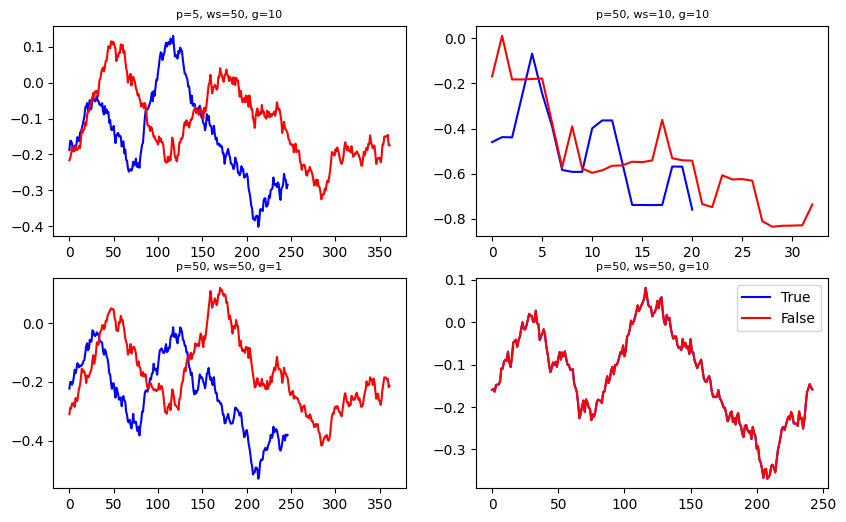

In [46]:
arc_grid_search('Scream 2_0120082.txt')